## THE SPARKS FOUNDATION 

## NAME: HEEMALI PANCHAL


## DOMAIN : Data Science & Business Analytics interns

# TASK- 1
***Prediction using supervised ML***

***OBJECTIVE: What will be predicted score if a student studies for 9.25 hrs/ day?***

***METHOD USED: SIMPLE LINEAR REGRESSION***

# STEP:1

In [3]:
#IMPORT ALL  REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#IMPORT DATA
url = "http://bit.ly/w-data"
data = pd.read_csv(url)


In [9]:
data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
#To check number of rows and columns
data.shape

(25, 2)

In [12]:
#overall info. about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## DESCRITIVE STATISTCS

In [13]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# STEP:2

## DATA VISULIZATION

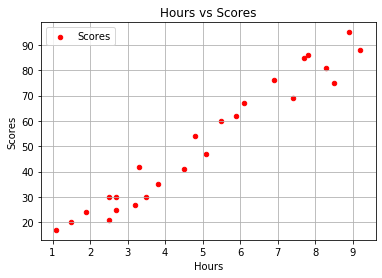

In [14]:
data.plot(x="Hours",y="Scores",kind="scatter",marker="o",color="red")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.legend(["Scores"])
plt.grid()
plt.show()


## From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.


# STEP:3


# Data Preparation

In [15]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0) 


In [17]:
from sklearn.linear_model import LinearRegression  
LReg = LinearRegression() 
LReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(LReg.coef_),print(LReg.intercept_)

[9.91065648]
2.018160041434683


(None, None)

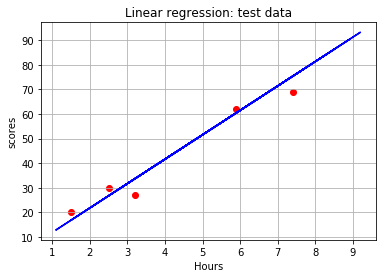

In [19]:
# Plotting the regression line
line = LReg.coef_*X+LReg.intercept_

# Plotting for the test data

plt.scatter(X_test, y_test,color="red")
plt.plot(X, line,color="blue")
plt.xlabel("Hours")
plt.ylabel("scores")
plt.title("Linear regression: test data")
plt.grid()
plt.show()

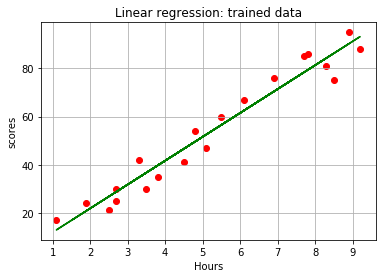

In [20]:
# Plotting for the train data

plt.scatter(X_train, y_train,color="red")
plt.plot(X, line,color="green")
plt.xlabel("Hours")
plt.ylabel("scores")
plt.title("Linear regression: trained data")
plt.grid()
plt.show()

# STEP:4

# Making prediction

In [23]:
# Make predictions using the testing set
y_pred = LReg.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [24]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [25]:
#R^2 determination
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_pred)
print("R squared is",R2)

R squared is 0.9454906892105356


### Here,R square is approximately 0.94 ie 94% variability is explained of the response variable(scores) . So, we can conclude that the model is good fit

In [26]:
#Testing with our own data
Hours = 9.25
own_pred = LReg.predict([[Hours]])
print("the predicted scores if a person studies for","Hours is",own_pred[0])

the predicted scores if a person studies for Hours is 93.69173248737538



# STEP:5

# Evaluating the model

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


# THANK YOU!!!